In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline
import mysql.connector as mysqlConnector
import sqlite3
import pandas as pd

connexion = mysql.connector.connect(host='127.0.0.1',
                        user='root',
                        password='bienmalacquisneprofitejamais1!',
                        database='CREDITS')
if connexion:
    print("Connexion à la base de données CREDITS réussie")
else:
    print("Connexion échouée")


Connexion à la base de données CREDITS réussie


In [2]:
query1 = 'SELECT * FROM CREDITS.CLIENT;'
df1=pd.read_sql(query1,connexion)
df1

,id_client,cible,age,genre,niveau_etude,statut_matrimonial,nombre_enfants,accompagnant,total_revenus,type_revenus,categorie_pro,type_entreprise,anciennete,telephone_pro,proprietaire,type_logement,possede_voiture,anciennete_banque,mise_a_jour_documents
0,100002,1,25,0,0,0,0,0,202500,0,0,8,1,1,0,0,1,9,5
1,100003,0,45,1,1,1,0,1,270000,1,1,12,3,1,1,0,1,3,0
2,100004,0,52,0,0,0,0,0,67500,0,0,12,0,1,0,0,0,11,6
3,100006,0,52,1,0,2,0,0,135000,0,0,8,8,1,0,0,1,26,6
4,100007,0,54,0,0,0,0,0,121500,0,1,1,8,1,0,0,1,11,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251029,456248,0,45,1,0,4,0,0,153000,0,5,2,19,1,0,0,1,26,0
251030,456251,0,25,0,0,4,0,0,157500,0,5,7,0,1,1,2,1,23,5
251031,456253,0,41,1,1,4,0,0,153000,0,3,12,21,1,0,0,1,18,14
251032,456254,1,32,1,0,1,0,0,171000,2,0,8,13,1,0,0,1,7,2


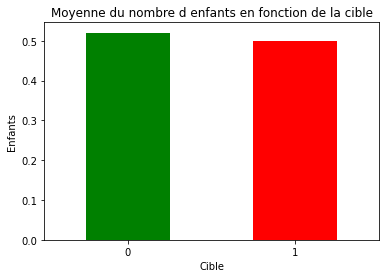

In [3]:
query2a = 'SELECT cible, ROUND( AVG(nombre_enfants),2) AS MPF FROM CREDITS.CLIENT GROUP BY cible '
df2a=pd.read_sql(query2a,connexion)
df2a.MPF.plot(xlabel='Cible', ylabel='Enfants',color=['g','r'], rot = 0,
             kind='bar',title ='Moyenne du nombre d enfants en fonction de la cible');

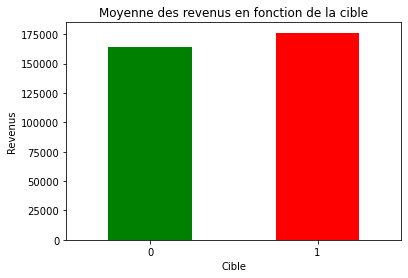

In [4]:
query2b = 'SELECT cible, ROUND( AVG(total_revenus),2) AS moyenne_revenus FROM CREDITS.CLIENT GROUP BY cible '
df2b=pd.read_sql(query2b,connexion)
df2b.moyenne_revenus.plot(xlabel='Cible', ylabel='Revenus',color=['g','r'], rot = 0,
             kind='bar',title ='Moyenne des revenus en fonction de la cible');

In [5]:
query3a = 'SELECT CLIENT.id_client FROM CLIENT INNER JOIN CREDIT ON CLIENT.id_client = CREDIT.id_client WHERE  CLIENT.cible = 0 AND CLIENT.genre = 0 AND CLIENT.statut_matrimonial = 4 AND CREDIT.statut_contrat = 1'
df3a=pd.read_sql(query3a,connexion)
df3a

,id_client
0,100145
1,100163
2,100178
3,100178
4,100178
...,...
7789,455593
7790,455593
7791,455643
7792,455862


In [23]:
query3b = 'SELECT CLIENT.cible, genre, BIEN.type_bien FROM CLIENT INNER JOIN CREDIT ON CLIENT.id_client = CREDIT.id_client INNER JOIN BIEN ON CREDIT.id_bien = BIEN.id_bien WHERE BIEN.type_bien = 1'
df3b=pd.read_sql(query3b,connexion)
df3b

,cible,genre,type_bien
0,0,1,1
1,0,1,1
2,0,0,1
3,0,1,1
4,0,1,1
...,...,...,...
4477,0,1,1
4478,0,1,1
4479,0,1,1
4480,0,1,1


In [14]:
# Avec un échantillon

query4 = 'SELECT (count(*) * sum(cible * genre) - sum(cible) * sum(genre)) / (sqrt(count(*) * sum(cible * cible) - sum(cible) * sum(cible)) * sqrt(count(*) * sum(genre * genre) - sum(genre) * sum(genre))) AS correlation_coefficient_sample FROM CLIENT'
df4=pd.read_sql(query4,connexion)
df4

# Pas de corrélation

,correlation_coefficient_sample
0,-0.049501


In [25]:
# Avec tous les clients

query5 = 'SELECT (avg(cible * genre) - avg(cible) * avg(genre)) / (sqrt(avg(cible * cible) - avg(cible) * avg(cible)) * sqrt(avg(genre * genre) - avg(genre) * avg(genre))) AS correlation_coefficient_clients FROM CLIENT'
df5=pd.read_sql(query5,connexion)
df5

# Pas de corrélation 

,correlation_coefficient_clients
0,-0.049501


In [22]:
# Ne pas oublier de fermer la connexion 
connexion.close()